In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
names_dir = '/Users/seunk/Desktop/DataScience/babynames/'
names_data_list = []
names_columns = ['state', 'gender', 'year', 'name', 'babies']
for file in os.listdir(names_dir):
    if file.endswith('.TXT'):
        names_data = pd.read_csv(names_dir + file, header=None,names=names_columns)
        names_data_list.append(names_data)
    else:
        continue
names_data = pd.concat(names_data_list)

In [3]:
names_data['year']= pd.to_numeric(names_data['year'],errors='coerce')

In [4]:
names_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311504 entries, 0 to 28750
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   state   object
 1   gender  object
 2   year    int64 
 3   name    object
 4   babies  int64 
dtypes: int64(2), object(3)
memory usage: 288.9+ MB


In [5]:
data = names_data[names_data['year'] >= 1950]

In [6]:
data.head(2)

,state,gender,year,name,babies
1269,AK,F,1950,Mary,71
1270,AK,F,1950,Linda,68


In [7]:
data.groupby('gender')['babies'].sum() / data['babies'].sum()

gender
F    0.470011
M    0.529989
Name: babies, dtype: float64

In [8]:
data.gender = data['gender']

C:\Users\seunk\AppData\Local\Temp\ipykernel_29556\321060875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.gender = data['gender']


In [9]:
total_babies =  data.babies.sum()
female_percent = data[data.gender=='F']['babies'].sum()/total_babies
male_percent = data[data.gender=='M']['babies'].sum()/total_babies

In [10]:
male_percent

0.5299887076792776

In [11]:
most_popular_names = (
    data
    .groupby(['name','gender'])
    .babies
    .sum()
    .reset_index()
    .sort_values('babies', ascending=False)
)

In [20]:
most_popular_names[:2]

,name,gender,babies
21483,Michael,M,3918662
13220,James,M,2902195


# Unique Names by Gender
calculate and plot the number of unique names per gender

In [16]:
unique_names_per_gender = (
data
.groupby(['year','gender'])
.name
.nunique()
.unstack()
)

In [17]:
unique_names_per_gender.head()

gender,F,M
year,,
1950,2112,1721
1951,2173,1735
1952,2210,1763
1953,2269,1757
1954,2300,1755


<AxesSubplot:xlabel='year'>

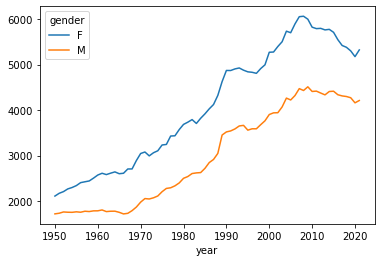

In [21]:
unique_names_per_gender.plot()

<AxesSubplot:xlabel='year'>

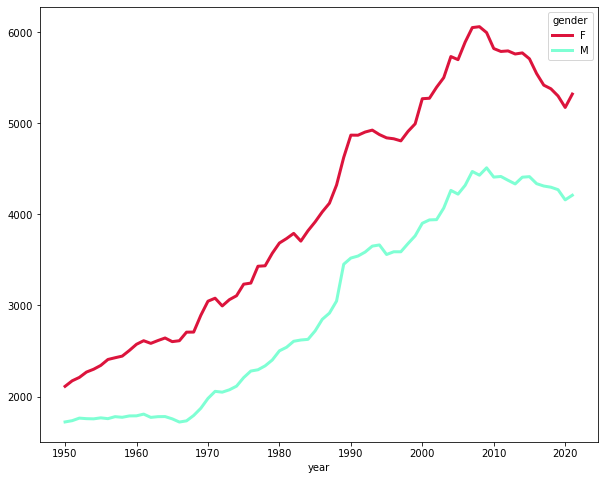

In [34]:
unique_names_per_gender.plot(figsize=(10,8),lw=3, color=['crimson','aquamarine'])

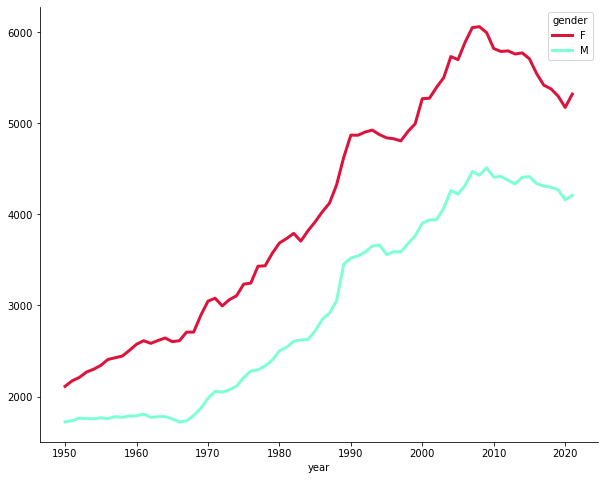

In [36]:
unique_names_per_gender.plot(figsize=(10,8),lw=3, color=['crimson','aquamarine'])
sns.despine()

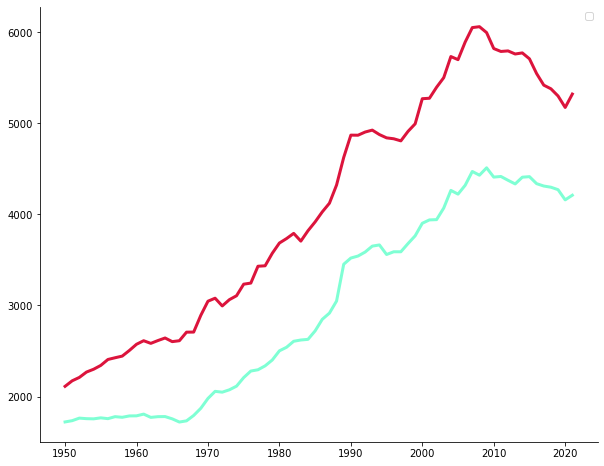

In [38]:
unique_names_per_gender.plot(figsize=(10,8),lw=3, color=['crimson','aquamarine'])
sns.despine()
plt.xlabel('')
plt.legend([])

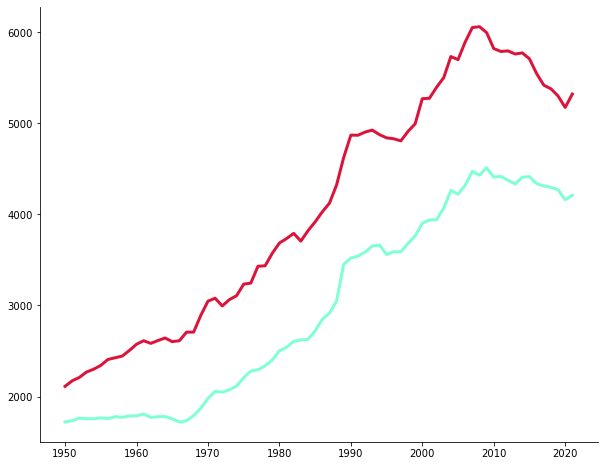

In [39]:
unique_names_per_gender.plot(figsize=(10,8),lw=3, color=['crimson','aquamarine'])
sns.despine()
plt.xlabel('')
plt.legend([],frameon=False)

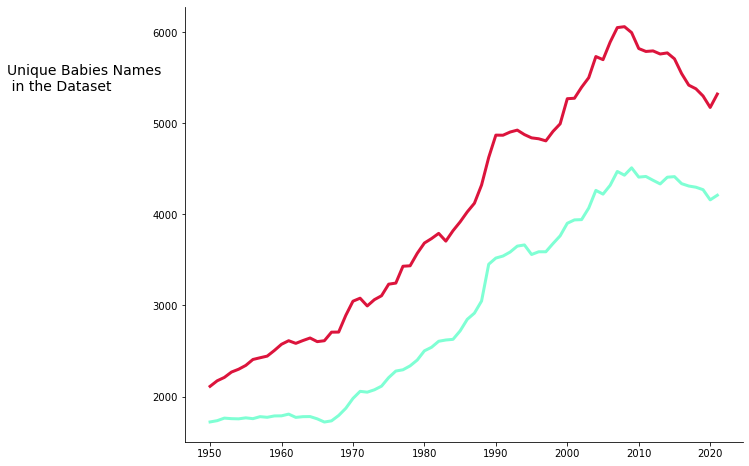

In [54]:
unique_names_per_gender.plot(figsize=(10,8),lw=3, color=['crimson','aquamarine'])
sns.despine()
plt.xlabel('')
plt.legend([],frameon=False)
plt.ylabel('Unique Babies Names\n in the Dataset',
    rotation=0,
    position=(-0.7,0.8),
    ha = 'left',
        labelpad=145,
        fontsize=14,
        color='black'
          );

Text(2022, 4200, 'Male')

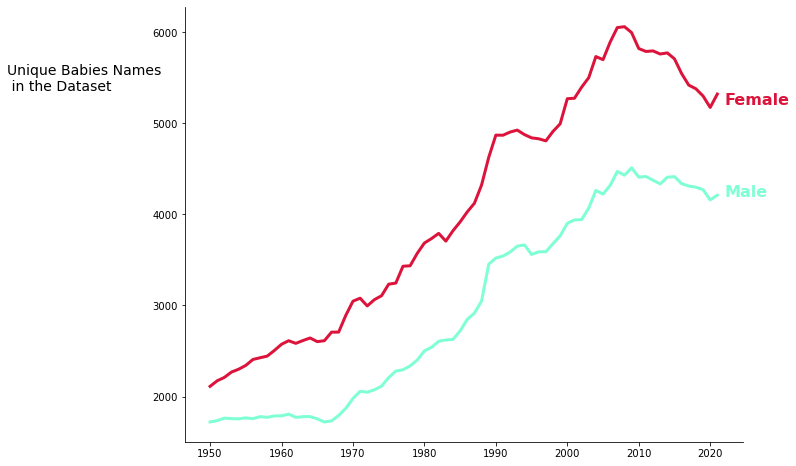

In [57]:
unique_names_per_gender.plot(figsize=(10,8),lw=3, color=['crimson','aquamarine'])
sns.despine()
plt.xlabel('')
plt.legend([],frameon=False)
plt.ylabel('Unique Babies Names\n in the Dataset',
    rotation=0,
    position=(-0.7,0.8),
    ha = 'left',
        labelpad=145,
        fontsize=14,
        color='black'
          );
plt.text(2022,5200,'Female', color='crimson',fontsize=16,fontweight='bold')
plt.text(2022,4200,'Male', color='aquamarine',fontsize=16,fontweight='bold')

Text(2022, 4000, '53)% of babies')

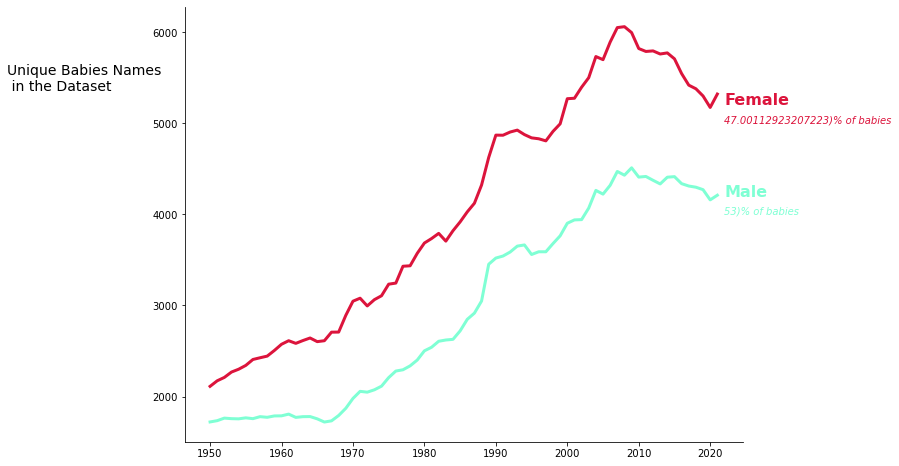

In [62]:
unique_names_per_gender.plot(figsize=(10,8),lw=3, color=['crimson','aquamarine'])
sns.despine()
plt.xlabel('')
plt.legend([],frameon=False)
plt.ylabel('Unique Babies Names\n in the Dataset',
    rotation=0,
    position=(-0.7,0.8),
    ha = 'left',
        labelpad=145,
        fontsize=14,
        color='black'
          );
plt.text(2022,5200,'Female', color='crimson',fontsize=16,fontweight='bold')
plt.text(2022,4200,'Male', color='aquamarine',fontsize=16,fontweight='bold')

plt.text(2022,5000,f'{female_percent*100:})% of babies',
    fontstyle='italic',color='crimson')
plt.text(2022,4000,f'{male_percent*100:.0f})% of babies',
    fontstyle='italic',color='aquamarine')

* " .0f " is used to approximate

Text(2022, 4000, '53)% of babies')

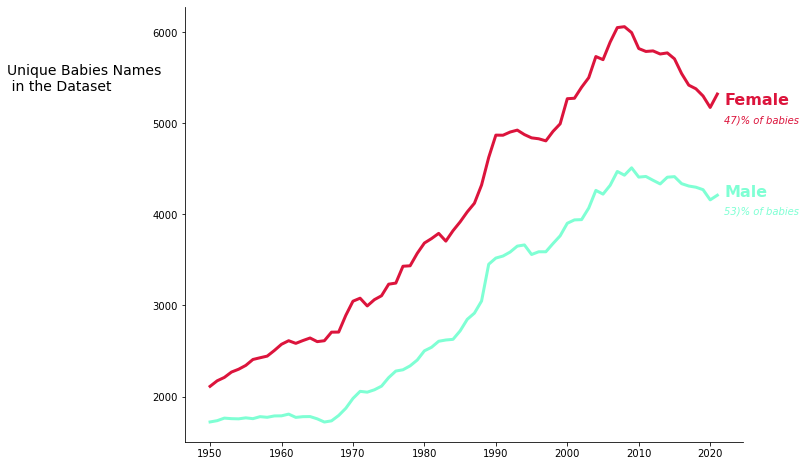

In [63]:
unique_names_per_gender.plot(figsize=(10,8),lw=3, color=['crimson','aquamarine'])
sns.despine()
plt.xlabel('')
plt.legend([],frameon=False)
plt.ylabel('Unique Babies Names\n in the Dataset',
    rotation=0,
    position=(-0.7,0.8),
    ha = 'left',
        labelpad=145,
        fontsize=14,
        color='black'
          );
plt.text(2022,5200,'Female', color='crimson',fontsize=16,fontweight='bold')
plt.text(2022,4200,'Male', color='aquamarine',fontsize=16,fontweight='bold')

plt.text(2022,5000,f'{female_percent*100:.0f})% of babies',
    fontstyle='italic',color='crimson')
plt.text(2022,4000,f'{male_percent*100:.0f})% of babies',
    fontstyle='italic',color='aquamarine')

In [ ]:
unique_names_per_gender.plot(figsize=(10,8),lw=3, color=['crimson','aquamarine'])
sns.despine()
plt.xlabel('')
plt.legend([],frameon=False)
plt.ylabel('Unique Babies Names\n in the Dataset',
    rotation=0,
    position=(-0.7,0.8),
    ha = 'left',
        labelpad=145,
        fontsize=14,
        color='black'
          );
plt.text(2022,5200,'Female', color='crimson',fontsize=16,fontweight='bold')
plt.text(2022,4200,'Male', color='aquamarine',fontsize=16,fontweight='bold')

plt.text(2022,5000,f'{female_percent*100:.0f})% of babies',
    fontstyle='italic',color='crimson')
plt.text(2022,4000,f'{male_percent*100:.0f})% of babies',
    fontstyle='italic',color='aquamarine')

